In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show_image(img1, img2, descr1, descr2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].set_title(descr1)
    axes[0].axis("off")

    axes[1].imshow(img2)
    axes[1].set_title(descr2)
    axes[1].axis("off")

    plt.show()

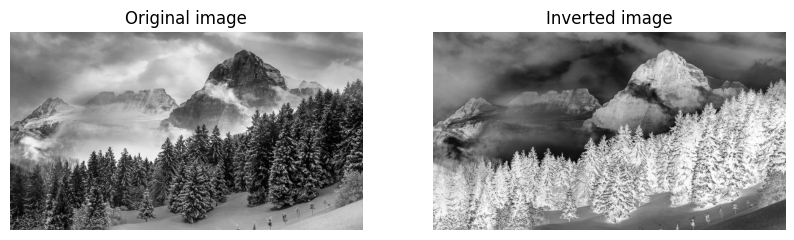

In [ ]:
image = cv2.imread("images/Task1.jpg")

# invert the colors
# bitwise_not(img):      switching each bit of img i <=> subtracting i from full 1s <=> inverting i
inverted_image = cv2.bitwise_not(image)

show_image(image, inverted_image, "Original image", "Inverted image")

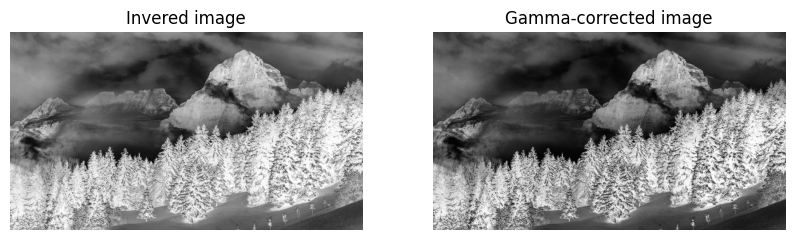

In [6]:
# gamma correction: power transform with convention
# - gamma > 1 => brighter
#   - 1/gamma < 1 => log transform, dark fleshed white compressed
# - gamma < 1 => darker
#   - 1/gamma > 1 => power transform, dark compressed white fleshed
gamma = 0.7
inv_gamma = 1.0 / gamma

# LUT(img, tble):   for every possible intensity i of the image, set
#                   tble[i] = gamma(i) = A*V^gamma, V convention in [0,1]
#                   LUT(img, tble) sets img[i,j] = tble[img[i,j]]
table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
adjusted_image = cv2.LUT(inverted_image, table)

show_image(inverted_image, adjusted_image, "Invered image", "Gamma-corrected image")

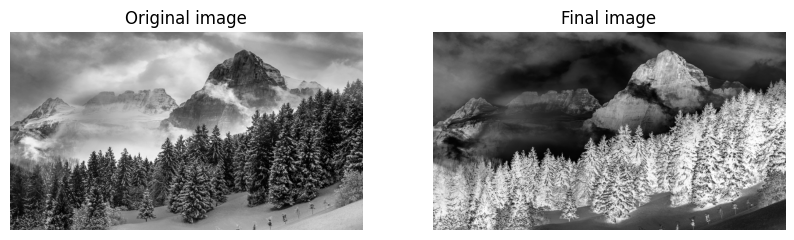

In [7]:
show_image(image, adjusted_image, "Original image", "Final image")